In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'Zoo.csv')

In [3]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
df.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [6]:
import seaborn as sns

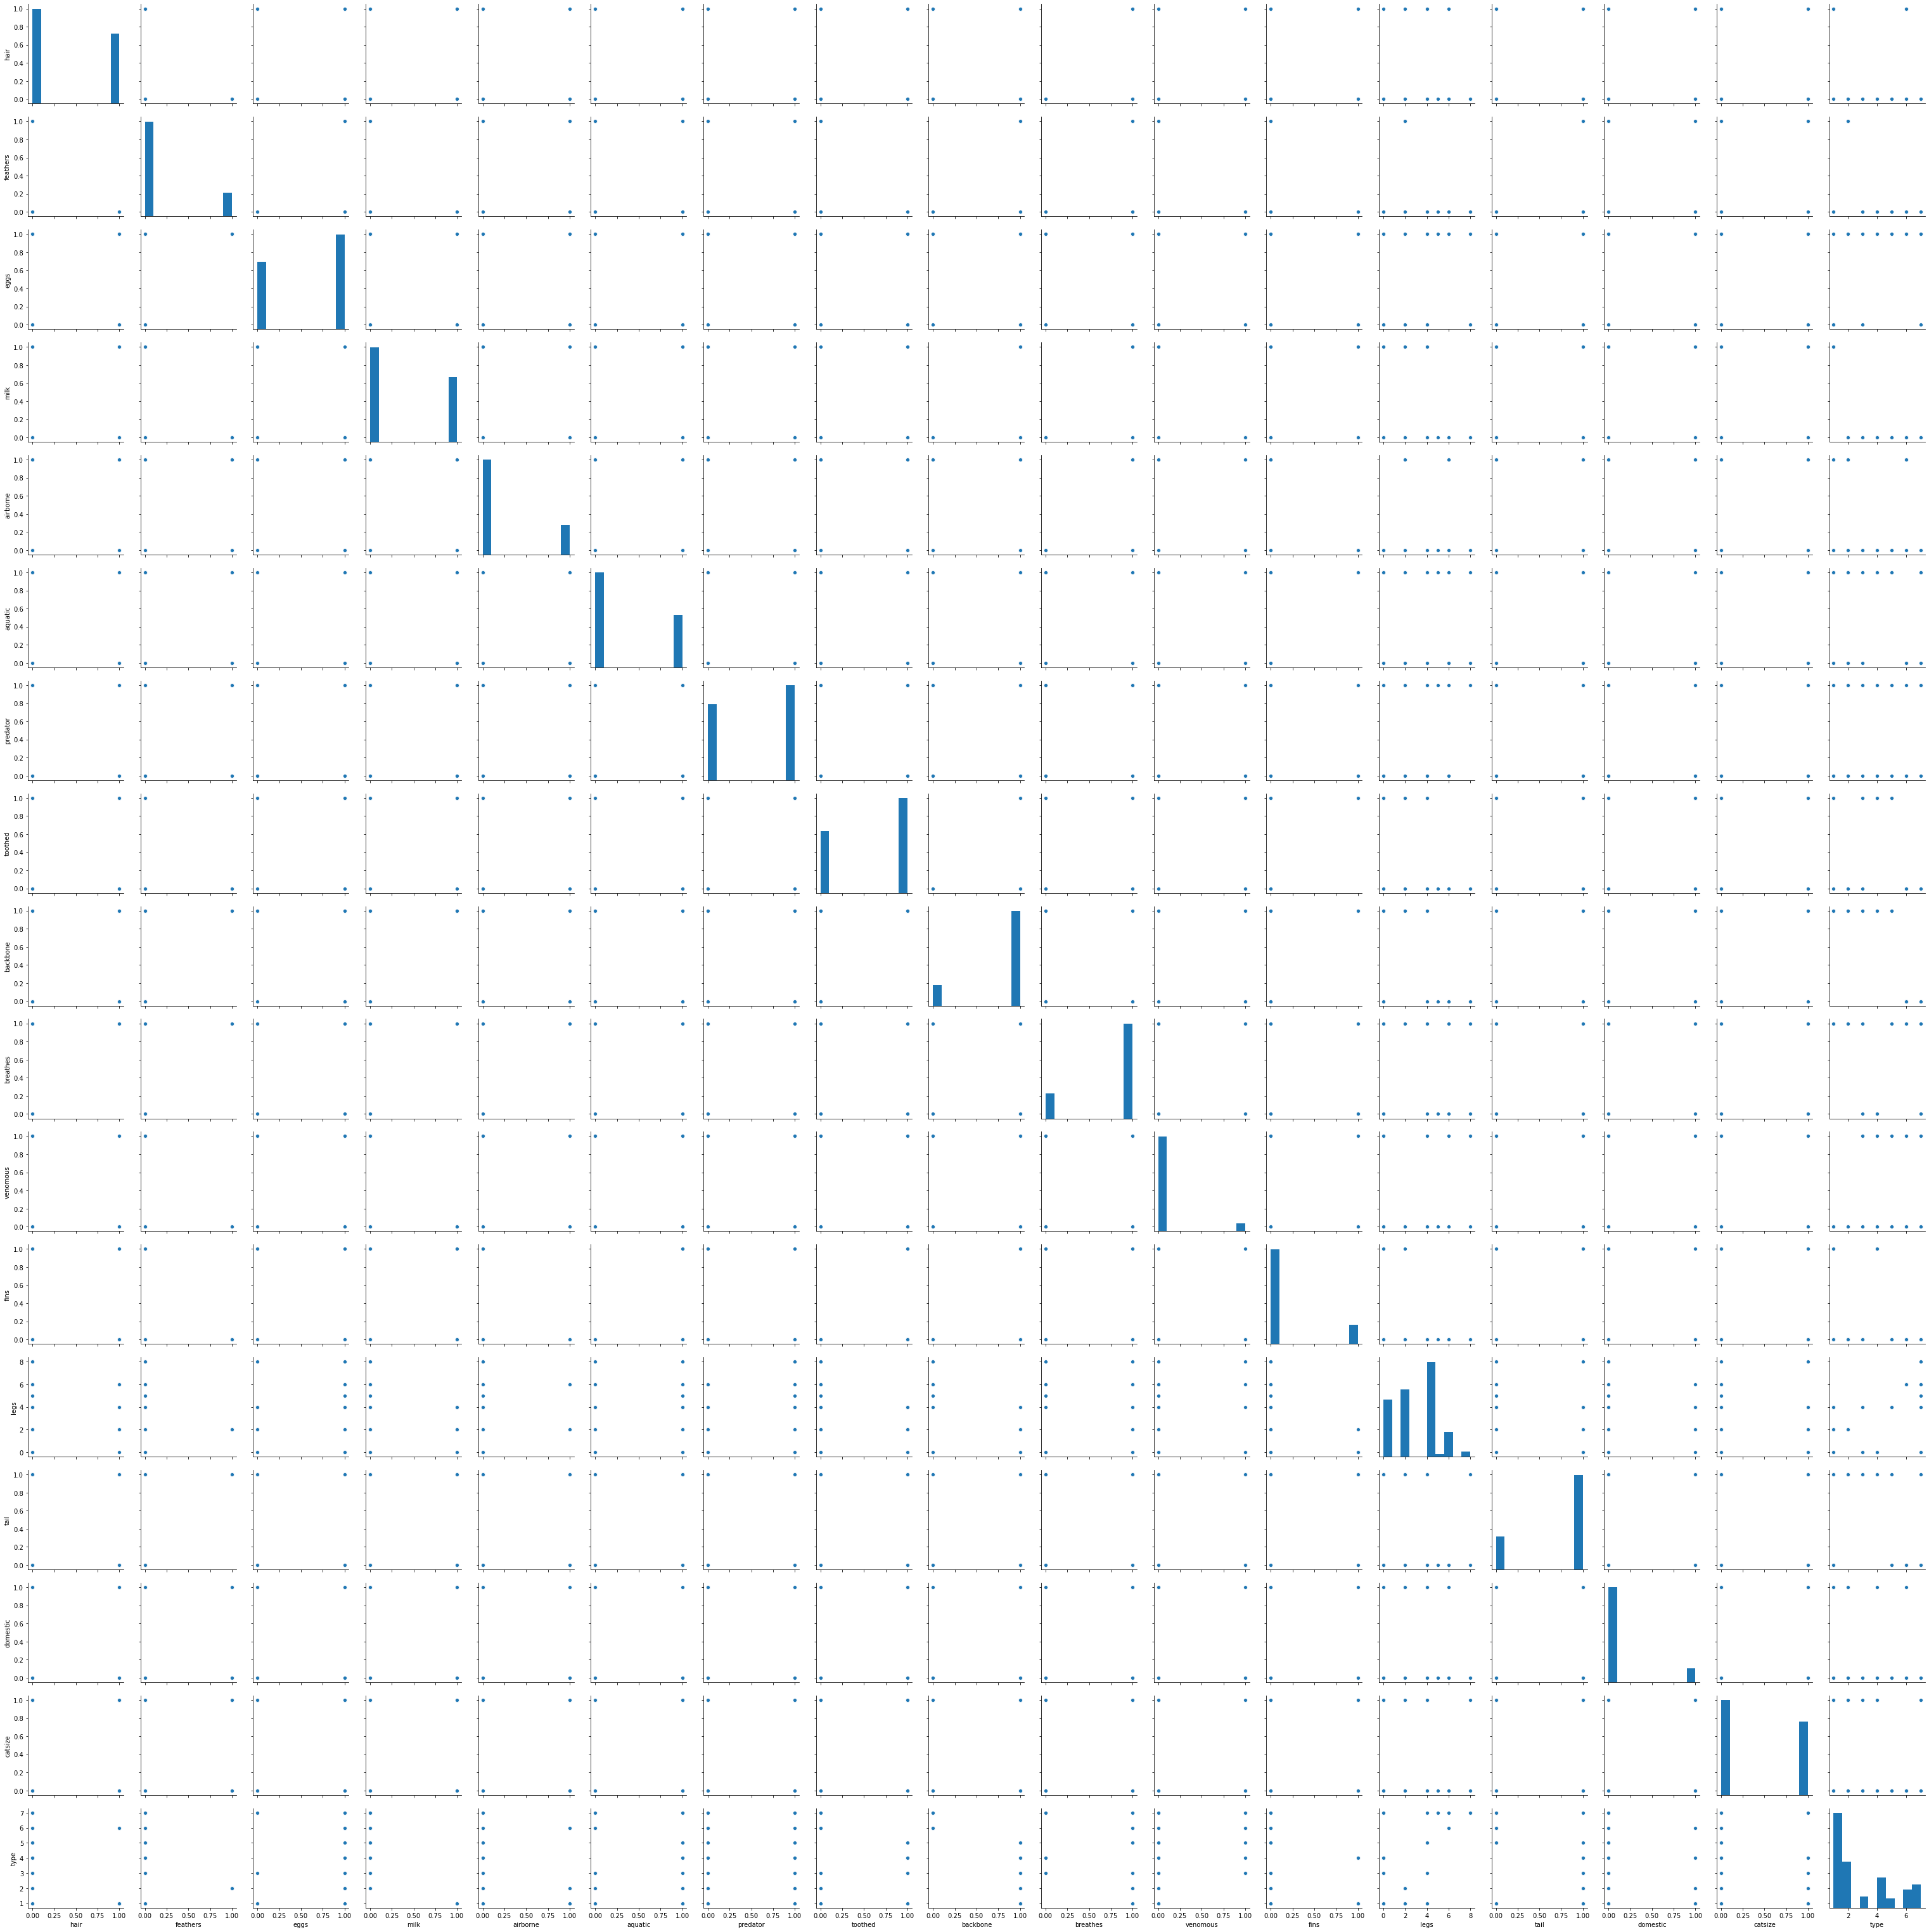

In [7]:
sns.pairplot(df)


In [8]:
df.info() #cheking the info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
df['animal name'].describe()

count      101
unique     100
top       frog
freq         2
Name: animal name, dtype: object

# check the outlier

In [17]:
from sklearn.ensemble import IsolationForest
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(df.iloc[:,1:])

IsolationForest(contamination=0.01, random_state=10)

In [18]:
# predictions
x_pred_outliers = clf.predict(df.iloc[:,1:])

In [19]:
df['anomaly']=clf.predict(df.iloc[:,1:])

In [21]:
#Print the outlier data points
df[df['anomaly']==-1]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,anomaly
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7,-1


In [22]:
df_cleaned= df.drop(df.index[[2]],axis=0).reset_index()

In [23]:
df_cleaned

,index,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,anomaly
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
3,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
4,5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1,1
96,97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6,1
97,98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1
98,99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7,1


In [24]:
df_cleaned=df_cleaned.drop(['anomaly', 'index'], axis=1)

In [25]:
df_cleaned


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [26]:
X = df_cleaned.iloc[:,1:17]
Y = df_cleaned.iloc[:,-1]

In [28]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y , test_size=0.3, random_state=0)

In [31]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((70, 16), (30, 16), (70,), (30,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier # fiting KNN model

In [51]:
model = KNeighborsClassifier(n_neighbors=3) #taking 3 after grid cv
results = model.fit(Xtrain, ytrain ) # fiting KNN model

In [52]:
results.score(X,Y)

0.98

In [53]:
#Predicting the test set result  
y_pred= model.predict(Xtest) 

In [54]:
#to cheak the accuracy Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_pred)

0.9333333333333333

In [55]:
data = pd.DataFrame({'ytest':ytest,'y_pred':y_pred},)

In [45]:
data

,ytest,y_pred
26,1,1
86,2,2
2,1,1
55,2,2
75,3,4
93,1,1
16,1,1
73,1,1
54,1,1
95,1,1


In [46]:
#check GridSearchCV
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(3,40))
param_grid = dict(n_neighbors=n_neighbors)

In [47]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv =40)
grid.fit(X, Y)

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=40, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])})

In [48]:
grid.best_score_

0.9541666666666666

In [49]:
grid.best_params_

{'n_neighbors': 3}

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Pytho

C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=40.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\HP\AppData\Roaming\Python\Pytho

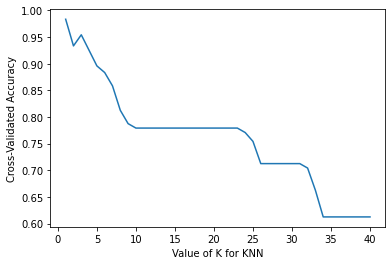

In [50]:
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=40)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()